# Deep Learning with PyTorch: A 60-minute Blitz

Goal of this tutorial:

- Understand PyTorch's Tensor library and neural networks at a high level.
- Train a small neural network to classify images

*This tutorial assumes that you have a basic familiarity of numpy*


**Note:** Make sure you have the [torch](https://github.com/pytorch/pytorch) and [torchvision](https://github.com/pytorch/vision) packages installed.


### What is PyTorch?

It's a Python based scientific computing package targeted at two sets of audiences:

- A replacement for numpy to use the power of GPUs
- a deep learning research platform that provides maximum flexibility and speed


### Getting Started

#### Tensors
Tensors are similar to numpy's ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

In [1]:
from __future__ import print_function
import torch

In [2]:
x = torch.Tensor(5, 3)  # construct a 5x3 matrix, uninitialized

In [3]:
x = torch.rand(5, 3)  # construct a randomly initialized matrix

In [13]:
x


 0.5469  0.5380  0.5566
 0.2610  0.7478  0.4831
 0.3079  0.3052  0.9435
 0.5025  0.9399  0.6007
 0.1941  0.4983  0.2702
[torch.FloatTensor of size 5x3]

In [5]:
x.size()

torch.Size([5, 3])

*NOTE: `torch.Size` is in fact a tuple, so it supports the same operations*

In [6]:
y = torch.rand(5, 3)

In [7]:
# addition: syntax 1
x + y


 0.6300  1.2903  1.0898
 1.0598  1.4130  1.0186
 0.9262  0.4570  1.4282
 0.5667  1.5068  0.6974
 0.4678  0.8706  0.9165
[torch.FloatTensor of size 5x3]

In [8]:
# addition: syntax 2
torch.add(x, y)


 0.6300  1.2903  1.0898
 1.0598  1.4130  1.0186
 0.9262  0.4570  1.4282
 0.5667  1.5068  0.6974
 0.4678  0.8706  0.9165
[torch.FloatTensor of size 5x3]

In [9]:
# addition: giving an output tensor
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)


 0.6300  1.2903  1.0898
 1.0598  1.4130  1.0186
 0.9262  0.4570  1.4282
 0.5667  1.5068  0.6974
 0.4678  0.8706  0.9165
[torch.FloatTensor of size 5x3]

In [10]:
# addition: in-place
y.add_(x) # adds x to y


 0.6300  1.2903  1.0898
 1.0598  1.4130  1.0186
 0.9262  0.4570  1.4282
 0.5667  1.5068  0.6974
 0.4678  0.8706  0.9165
[torch.FloatTensor of size 5x3]

> **Note: ** Any operation that mutates a tensor in-place is post-fixed with an `_`
> 
> For example: `x.copy_(y)`, `x.t_()`, will change `x`.

In [12]:
# standard numpy-like indexing with all bells and whistles
x[:,1]


 0.5380
 0.7478
 0.3052
 0.9399
 0.4983
[torch.FloatTensor of size 5]

#### Read later:

100+ Tensor operations, including transposing, indexing, slicing, 
mathematical operations, linear algebra, random numbers, etc.

http://pytorch.org/docs/torch.html

### Numpy Bridge

Converting a torch Tensor to a numpy array and vice versa is a breeze.

The torch Tensor and numpy array will share their underlying memory locations, and changing one will change the other.

#### Converting torch Tensor to numpy Array

In [14]:
a = torch.ones(5)
a


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]

In [15]:
b = a.numpy()
b

array([ 1.,  1.,  1.,  1.,  1.], dtype=float32)

In [16]:
a.add_(1)
print(a)
print(b) # see how the numpy array changed in value


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[ 2.  2.  2.  2.  2.]


#### Converting numpy Array to torch Tensor

In [20]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print("i can edit it!")
print(b) # see how changing the np array changed the torch Tensor automatically

[ 2.  2.  2.  2.  2.]
i can edit it!

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



All the Tensors on the CPU except a CharTensor support converting to NumPy and back.

### CUDA Tensors

Tensors can be moved onto GPU using the `.cuda` function.

In [ ]:
# let us run this cell only if CUDA is available
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x + y


**Next: Neural Networks with PyTorch.**

Central to all neural networks in PyTorch is the `autograd` package.
Let's first briefly visit this, and we will then go to training our first neural network.

## Autograd: automatic differentiation

The `autograd` package provides automatic differentiation for all operations on Tensors.  
It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different. 

Let us see this in more simple terms with some examples.

`autograd.Variable` is the central class of the package. 
It wraps a Tensor, and supports nearly all of operations defined on it. Once you finish your computation you can call `.backward()` and have all the gradients computed automatically.

You can access the raw tensor through the `.data` attribute, while the gradient w.r.t. this variable is accumulated into `.grad`.

![Variable](images/Variable.png)

There's one more class which is very important for autograd implementation - a `Function`. 

`Variable` and `Function` are interconnected and build up an acyclic graph, that encodes a complete history of computation. Each variable has a `.creator` attribute that references a `Function` that has created the `Variable` (except for Variables created by the user - their `creator is None`).

If you want to compute the derivatives, you can call `.backward()` on a `Variable`. 
If `Variable` is a scalar (i.e. it holds a one element data), you don't need to specify any arguments to `backward()`, however if it has more elements, you need to specify a `grad_output` argument that is a tensor of matching shape.


In [21]:
from torch.autograd import Variable

In [22]:
x = Variable(torch.ones(2, 2), requires_grad = True)
x

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [23]:
y = x + 2
y

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

In [24]:
y.creator
# y was created as a result of an operation, 
# so it has a creator

In [25]:
z = y * y * 3
z

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]

In [26]:
out = z.mean()
out

Variable containing:
 27
[torch.FloatTensor of size 1]

In [27]:
# let's backprop now
out.backward()

# out.backward() is equivalent to doing out.backward(torch.Tensor([1.0]))

In [28]:
# print gradients d(out)/dx
x.grad

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]

You should have got a matrix of `4.5`.
Let's call the `out` *Variable* "$o$".  
We have that $o = \frac{1}{4}\sum_i z_i$, $z_i = 3(x_i+2)^2$ and $z_i\bigr\rvert_{x_i=1} = 27$. Therefore, $\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2)$, hence $\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$.

> **You can do many crazy things with autograd:**

In [57]:
x = torch.randn(3)
x = Variable(x, requires_grad = True)

In [58]:
y = x * 2
while y.data.norm() < 1000:
    y = y * 2

In [59]:
y

Variable containing:
 595.8066
-693.7092
-695.0648
[torch.FloatTensor of size 3]

In [73]:
#gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
gradients = torch.FloatTensor([1.0, 1.0, 1.0])
y.backward(gradients)
#gradients = torch.FloatTensor([-1.0, -1.0, -1.0])
#y.backward(gradients)

In [68]:
x.grad

Variable containing:
 2048
 2048
 2048
[torch.FloatTensor of size 3]

##### Read Later:
> You can read more documentation on `Variable` and `Function` here: [pytorch.org/docs/autograd.html](http://pytorch.org/docs/autograd.html)



### Neural Networks
Neural networks can be constructed using the `torch.nn` package.

Now that you had a glimpse of `autograd`, `nn` depends on `autograd` to define models and differentiate them.

An `nn.Module` contains layers, and a method `forward(input)`that returns the `output`.

For example, look at this network that classfies digit images:

![convnet](images/mnist.png)

It is a simple feed-forward network.
It takes the input, feeds it through several layers one after the other, and then finally gives the output.

A typical training procedure for a neural network is as follows:
- define the neural network that has some learnable parameters (or weights)
- iterate over a dataset of inputs:
  - process input through network
  - compute the loss (how far is the output from being correct)
  - propagate gradients back into the network's parameters
  - update the weights of the network
    - typically using a simple update rule: `weight = weight - learning_rate * gradient`
  

Let's define this network:

In [69]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) 
        # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120) 
        # an affine operation: y = Wx + b
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) 
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) # If the size is a square you can only specify a single number
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:] # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
net

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)

You just have to define the `forward` function, and the `backward` function (where gradients are computed) is automatically defined for you using `autograd`.

You can use any of the Tensor operations in the `forward` function.

The learnable parameters of a model are returned by `net.parameters()`

In [70]:
params = list(net.parameters())
print(len(params))
print(params[0].size()) # conv1's .weight

10
torch.Size([6, 1, 5, 5])


The input to the forward is an `autograd.Variable`, and so is the output.

In [105]:
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
out

Variable containing:
-0.0547  0.0990 -0.0632  0.0669 -0.0044  0.1131 -0.1413 -0.0413 -0.0635 -0.0275
[torch.FloatTensor of size 1x10]

In [99]:
#small example to explore
#x = Variable(torch.ones(5))
#W = Variable(torch.randn(3, 5), requires_grad = True)
#y = torch.mv(W, x)
#y = torch.sum(y)
#y.backward(torch.FloatTensor([1]))
#W.grad
#x
#W

In [106]:
net.zero_grad() # zeroes the gradient buffers of all parameters
out.backward(torch.randn(1, 10)) # backprops with random gradients

> #### NOTE: `torch.nn` only supports mini-batches
The entire `torch.nn` package only supports inputs that are a mini-batch of samples, and not a single sample.  
For example, `nn.Conv2d` will take in a 4D Tensor of `nSamples x nChannels x Height x Width`.

> *If you have a single sample, just use `input.unsqueeze(0)` to add a fake batch dimension.*

### Recap of all the classes you've seen so far:

* `torch.Tensor` - A **multi-dimensional array**.
* `autograd.Variable` - **Wraps a Tensor and records the history of operations** applied to it. Has the same API as a `Tensor`, with some additions like `backward()`. Also **holds the gradient** w.r.t. the tensor.
* `nn.Module` - Neural network module. **Convenient way of encapsulating parameters**, with helpers for moving them to GPU, exporting, loading, etc.
* `nn.Parameter` - A kind of Variable, that is **automatically registered as a parameter when assigned as an attribute to a `Module`**.
* `autograd.Function` - Implements **forward and backward definitions of an autograd operation**. Every `Variable` operation, creates at least a single `Function` node, that connects to functions that created a `Variable` and **encodes its history**.

##### At this point, we covered:
- Defining a neural network
- Processing inputs and calling backward.

##### Still Left:
- Computing the loss
- Updating the weights of the network


A loss function takes the (output, target) pair of inputs, and computes a value that estimates how far away the output is from the target.

There are [several different loss functions under the nn package](http://pytorch.org/docs/nn.html#loss-functions).

A simple loss is: `nn.MSELoss` which computes the mean-squared error between the input and the target.

For example:

In [117]:
output = net(input)
target = Variable(torch.range(1, 10))  # a dummy target, for example
criterion = nn.MSELoss()
loss = criterion(output, target)
loss

Variable containing:
 38.7637
[torch.FloatTensor of size 1]

Now, if you follow `loss` in the backward direction, using it's `.creator` attribute, you will see a graph of computations that looks like this:

```
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d  
      -> view -> linear -> relu -> linear -> relu -> linear 
      -> MSELoss
      -> loss
```

So, when we call `loss.backward()`, the whole graph is differentiated w.r.t. the loss, and all Variables in the graph will have their `.grad` Variable accumulated with the gradient.
       

In [118]:
# For illustration, let us follow a few steps backward
print(loss.creator) # MSELoss
print(loss.creator.previous_functions[0][0]) # Linear
print(loss.creator.previous_functions[0][0].previous_functions[0][0]) # ReLU

In [119]:
# now we shall call loss.backward(), and have a look at conv1's bias gradients before and after the backward.
net.zero_grad() # zeroes the gradient buffers of all parameters
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)
print('conv1.bias.data before backward')
print(net.conv1.bias.data)
loss.backward()
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)
print('conv1.bias.data after backward')
print(net.conv1.bias.data)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.data before backward

 0.0908
 0.1395
-0.0932
 0.1697
 0.1064
 0.0245
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
-0.1101
 0.0183
-0.0450
 0.0306
 0.0643
 0.0745
[torch.FloatTensor of size 6]

conv1.bias.data after backward

 0.0908
 0.1395
-0.0932
 0.1697
 0.1064
 0.0245
[torch.FloatTensor of size 6]



Now, we have seen how to use loss functions.

##### Read Later:

> The neural network package contains various modules and loss functions that form the building blocks of deep neural networks. A full list with documentation is here: http://pytorch.org/docs/nn.html


**The only thing left to learn is:**
- updating the weights of the network

The simplest update rule used in practice is the Stochastic Gradient Descent (SGD):
> `weight = weight - learning_rate * gradient`

We can implement this using simple python code:

```python
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)
```

However, as you use neural networks, you want to use various different update rules such as SGD, Nesterov-SGD, Adam, RMSProp, etc.

To enable this, we built a small package: `torch.optim` that implements all these methods.
Using it is very simple:

In [120]:
import torch.optim as optim
# create your optimizer
optimizer = optim.SGD(net.parameters(), lr = 0.01)

# in your training loop:
optimizer.zero_grad() # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() # Does the update

This is it.

Now you might be thinking,

### What about data?
Generally, when you have to deal with image, text, audio or video data, you can use standard python packages that load data into a numpy array. Then you can convert this array into a `torch.*Tensor`.

- For images, packages such as Pillow, OpenCV are useful.  
- For audio, packages such as scipy and librosa  
- For text, either raw Python or Cython based loading, or NLTK and SpaCy are useful.

Specifically for `vision`, we have created a package called `torchvision`, that 
has data loaders for common datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers for images.
This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.  
It has the classes: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'.
The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

![cifar10](images/cifar10.png)

## Training an image classifier

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using `torchvision`
1. Define a Convolution Neural Network
1. Define a loss function
1. Train the network on the training data
1. Test the network on the test data

### 1. Loading and normalizing CIFAR10

Using `torchvision`, it's extremely easy to load CIFAR10. 

In [121]:
import torchvision
import torchvision.transforms as transforms

In [123]:

# The output of torchvision datasets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                             ])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, 
                                          shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


*Let us show some of the training images, for fun.*

In [124]:
# functions to show an image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

 frog  ship  deer plane


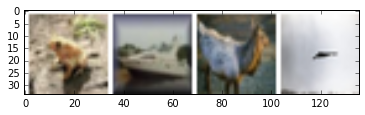

In [125]:
# show some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s'%classes[labels[j]] for j in range(4)))

### 2. Define a Convolution Neural Network

**Exercise:** Copy the neural network from the Neural Networks section above and modify it to take 3-channel images (instead of 1-channel images as it was defined).

Hint: You only have to change the first layer, change the number 1 to be 3.


```
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
```

**Solution:**


In [126]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool  = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

### 2. Define a Loss function and optimizer

In [127]:
criterion = nn.CrossEntropyLoss() # use a Classification Cross-Entropy loss
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 3. Train the network

This is when things start to get interesting.

We simply have to loop over our data iterator, and feed the inputs to 
the network and optimize

In [128]:
for epoch in range(2): # loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        
        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()        
        optimizer.step()
        
        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999: # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.235
[1,  4000] loss: 1.868
[1,  6000] loss: 1.670
[1,  8000] loss: 1.573
[1, 10000] loss: 1.512
[1, 12000] loss: 1.464
[2,  2000] loss: 1.397
[2,  4000] loss: 1.358
[2,  6000] loss: 1.338
[2,  8000] loss: 1.287
[2, 10000] loss: 1.293
[2, 12000] loss: 1.267
Finished Training


We have trained the network for 2 passes over the training dataset.  
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions. 

Okay, first step. Let us display an image from the test set to get familiar.

GroundTruth:    cat  ship  ship plane


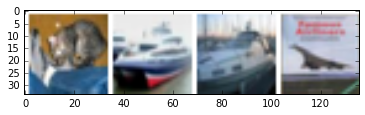

In [129]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s'%classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:

In [130]:
outputs = net(Variable(images))

# the outputs are energies for the 10 classes. 
# Higher the energy for a class, the more the network 
# thinks that the image is of the particular class

# So, let's get the index of the highest energy
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s'% classes[predicted[j][0]] for j in range(4)))

Predicted:    cat  ship  ship  ship


The results seem pretty good. 

Let us look at how the network performs on the whole dataset.

In [131]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


That looks waaay better than chance, which is 10% accuracy (randomly picking a class out of 10 classes).  
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did not perform well:

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1

In [ ]:
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Okay, so what next?

How do we run these neural networks on the GPU?

#### Training on the GPU
Just like how you transfer a Tensor on to the GPU, you transfer the neural net onto the GPU.

This will recursively go over all modules and convert their parameters and buffers to CUDA tensors.

In [ ]:
net.cuda()

Remember that you will have to send the inputs and targets at every step to the GPU too:

        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

Why dont I notice MASSIVE speedup compared to CPU? Because your network is realllly small.

**Exercise:** Try increasing the width of your network 
(argument 2 of the first `nn.Conv2d`, and argument 1 of the second `nn.Conv2d` -- they need to be the same number), see what kind of speedup you get.


#### Goals achieved:

- Understanding PyTorch's Tensor library and neural networks at a high level.
- Train a small neural network to classify images

## Where do I go next?

- [Train neural nets to play video games](https://goo.gl/uGOksc)
- [Train a state-of-the-art ResNet network on imagenet](https://github.com/pytorch/examples/tree/master/imagenet)
- [Train an face generator using Generative Adversarial Networks](https://github.com/pytorch/examples/tree/master/dcgan)
- [Train a word-level language model using Recurrent LSTM networks](https://github.com/pytorch/examples/tree/master/word_language_model)
- [More examples](https://github.com/pytorch/examples)
- [More tutorials](https://github.com/pytorch/tutorials)
- [Discuss PyTorch on the Forums](https://discuss.pytorch.org/)
- [Chat with other users on Slack](http://pytorch.slack.com/messages/beginner/)